In [1]:
import pandas as pd
df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()


,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
y = df.iloc[0:99, 4].values
y


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

In [3]:
import numpy as np
import matplotlib.pyplot as plt
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0: 99, [0, 2]].values
plt.scatter(x[:49, 0], x[:49, 1], color='red', marker='o', label='setosa')
plt.scatter(x[49:99, 0], x[49: 99, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()


<Figure size 640x480 with 1 Axes>

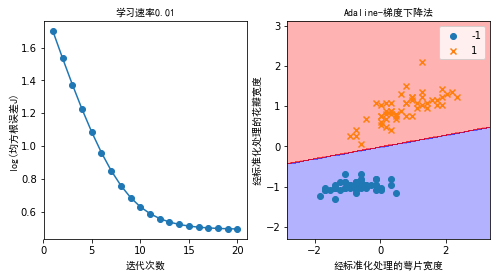

In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from matplotlib.colors import ListedColormap  
  
  
class AdalineBGD:  
    def __init__(self, eta=0.01, n_iter=50):  
        self.eta = eta  
        self.n_iter = n_iter  
  
    def fit(self, X, y):  
        self.w_ = np.zeros(X.shape[1]+1)  
        self.J_ = []  
  
        for _ in range(self.n_iter):  
            z = np.dot(X, self.w_[1:]) + self.w_[0]  
            self.w_[0] += self.eta * (y - z).sum()
            self.w_[1:] += self.eta * np.dot(X.T, (y - z))  
            self.J_.append(((y-z)**2).sum()*0.5)  
        return self  
  
    def predict(self, X):  
        return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0.0, 1, -1)  
  
  
def plot_decision_regions(X, y, classifier, ax):  
  
    # setup marker generator and color map  
    markers = ('o', 'x')  
    colors = ('blue', 'red')  
    cmap = ListedColormap(colors[:len(np.unique(y))])  
  
    # plot the decision region  
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))  
    z = classifier.predict(np.array([xx1.flatten(), xx2.flatten()]).T)  
    z = z.reshape(xx1.shape)  
    plt.contourf(xx1, xx2, z, cmap=cmap, alpha=0.3)  
    plt.xlim(x1_min, x1_max)  
    plt.ylim(x2_min, x2_max)  
  
    # plot class samples  
    for idx, cl in enumerate(np.unique(y)):  
        ax[1].scatter(x=X[y == cl, 0], y=X[y == cl, 1], cmap=cmap(idx), marker=markers[idx], label=cl, alpha=1)
    ax[1].legend(loc='best')
    ax[1].set_title('Adaline-梯度下降法', fontproperties='SimHei')  
    ax[1].set_xlabel('经标准化处理的萼片宽度', fontproperties='SimHei')  
    ax[1].set_ylabel('经标准化处理的花瓣宽度', fontproperties='SimHei')  
  
  
df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')  
y = df.iloc[:100, 4].values  
y = np.where(y == 'Iris-setosa', -1, 1)  
X = df.iloc[:100, [0, 2]].values  
X_std = X.copy()  
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()  
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  
  
  
fig1, ax1 = plt.subplots(1, 2, figsize=(8, 4))  
demo = AdalineBGD(n_iter=20, eta=0.01).fit(X_std, y)  
plot_decision_regions(X_std, y, demo, ax1)  
ax1[0].plot(range(1, len(demo.J_)+1), np.log10(demo.J_), marker='o')  
ax1[0].set_title('学习速率0.01', fontproperties='SimHei')  
ax1[0].set_xlabel('迭代次数', fontproperties='SimHei')  
ax1[0].set_ylabel('log(均方根误差J)', fontproperties='SimHei')  
  
  
plt.show() 
